In [4]:
import numpy as np
import glob
import os
from opac_mixer.read import ReadOpacChubb
from opac_mixer.emulator import Emulator, DEFAULT_MMR_RANGES

%matplotlib inline

2023-05-09 16:16:28.167316: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Quick Start

## Setup

In [5]:
# DEFAULT_MMR_RANGES = {
#     'CO': (1e-20, 0.005522337070205542),
#     'H2O': (1e-20, 0.0057565911404275204),
#     'HCN': (1e-20, 9.103077483740115e-05),
#     'C2H2,acetylene': (1e-20, 1.581540423097846e-05),
#     'CH4': (1e-20, 0.0031631031028604537),
#     'PH3': (1e-20, 6.401082202603451e-06),
#     'CO2': (1e-20, 0.00015319944152172055),
#     'NH3': (1e-20, 0.00084362326521647),
#     'H2S': (1e-20, 0.0003290905470710346),
#     'VO': (1e-20, 1.6153195092178982e-07),
#     'TiO': (1e-20, 3.925184850731112e-06),
#     'Na': (1e-20, 2.524986071526357e-05),
#     'K': (1e-20, 1.932224843084919e-06),
#     'SiO': (1e-20, 0.0010448970102509476),
#     'FeH': (1e-20, 0.000203477300968298)
# }

We first set some parameters

In [6]:
batchsize = int(8e5)  # approximate number of kappa(g) that we can use for learning

load = False  # load the kappas or mix them again
load_model = False  # load the ML model from file or start training from scratch

`opac_mixer` can currently deal with [ExomolOP](https://www.aanda.org/articles/aa/full_html/2021/02/aa38350-20/aa38350-20.html) files created for petitRADTRANS. You can use exo-k to bin them down to lower resolution. There is a tutorial available for this in the `petitRADTRANS` docs [(here)](https://petitradtrans.readthedocs.io/en/latest/content/notebooks/Rebinning_opacities.html).

In [7]:
# Setup the opacity files and prepare the reader instance
# R_10='10'
R_S1='S1'
base = f'{os.environ["pRT_input_data_path"]}/opacities/lines/corr_k'
# files_10 = glob.glob(os.path.join(base,f'*_R_{R_10}/*.h5'))
files_S1 = glob.glob(os.path.join(base,f'*_R_{R_S1}/*.h5'))
# opac_10 = ReadOpacChubb(files_10)
opac_S1 = ReadOpacChubb(files_S1)

Setup the emulator object. You can also use a set of readers for the emulator (e.g., multiple resolutions).

In [8]:
# em = Emulator([opac_10, opac_S1], filename_data='data/mix_S1_10.h5')
em = Emulator(opac_S1, filename_data='data/mix_S1.h5')

There are a few things to do now:

1. setup the sampling grid (this is the input data)
2. setup the mix (e.g., mix the opacities to get the y's for your ML model to learn)
3. Decide on a scaling function for model input and output (useful)

In [9]:
em.setup_sampling_grid(approx_batchsize=batchsize, bounds=DEFAULT_MMR_RANGES)
if not load:
    if __name__ == "__main__":
        em.setup_mix()
else:
    em.load_data()
em.setup_scaling()

  0%|          | 0/800 [00:00<?, ?it/s]2023-05-09 16:19:06.893979: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-09 16:19:06.992270: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-09 16:19:06.992711: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  

## Fiting

Setup the model and fit it!

In [ ]:
em.setup_model(learning_rate=1e-3, load=load_model, filename='data/mix_S1')
em.fit()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 permute (Permute)           (None, None, 16)          0         
                                                                 
 dense (Dense)               (None, None, 16)          256       
                                                                 
 lambda (Lambda)             (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                256       
                                                                 
Total params: 512
Trainable params: 512
Non-trainable params: 0
_________________________________________________________________


2023-05-09 16:19:43.481720: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch: 0, loss: 9.51e+01, val_error: (train - 4.49e-01, 9.90e-01); (test - 4.55e-01, 9.90e-01)
Epoch: 1, loss: 3.76e-01, val_error: (train - 3.49e-01, 9.93e-01); (test - 3.55e-01, 9.92e-01)
Epoch: 2, loss: 3.43e-01, val_error: (train - 3.45e-01, 9.93e-01); (test - 3.53e-01, 9.92e-01)
Epoch: 3, loss: 3.31e-01, val_error: (train - 3.34e-01, 9.93e-01); (test - 3.47e-01, 9.93e-01)
Epoch: 4, loss: 3.25e-01, val_error: (train - 3.44e-01, 9.93e-01); (test - 3.53e-01, 9.92e-01)
Epoch: 5, loss: 3.22e-01, val_error: (train - 3.62e-01, 9.92e-01); (test - 3.56e-01, 9.92e-01)
Epoch: 6, loss: 3.19e-01, val_error: (train - 3.08e-01, 9.93e-01); (test - 3.11e-01, 9.93e-01)
Epoch: 7, loss: 3.19e-01, val_error: (train - 3.27e-01, 9.93e-01); (test - 3.38e-01, 9.93e-01)
Epoch: 8, loss: 3.17e-01, val_error: (train - 3.02e-01, 9.94e-01); (test - 3.13e-01, 9.93e-01)
Epoch: 9, loss: 3.15e-01, val_error: (train - 3.16e-01, 9.93e-01); (test - 3.18e-01, 9.93e-01)
Epoch: 10, loss: 3.14e-01, val_error: (train - 3.0

## Plotting

Plot the weights

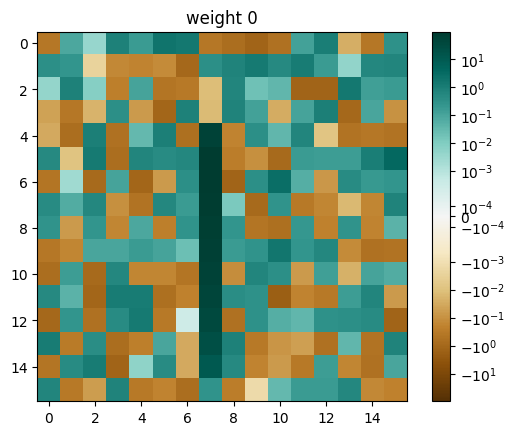

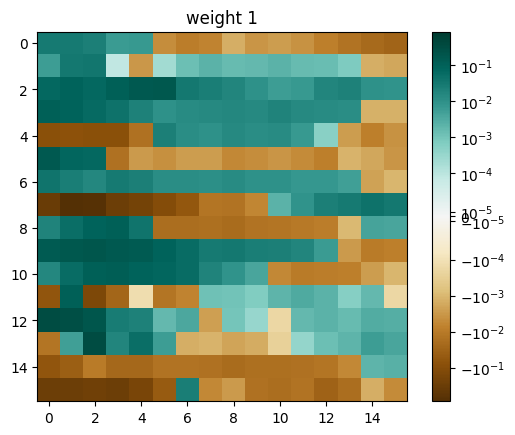

In [11]:
em.plot_weights(do_log=True)

Plot the predictions

5000/5000 [==============================] - 5s 922us/step


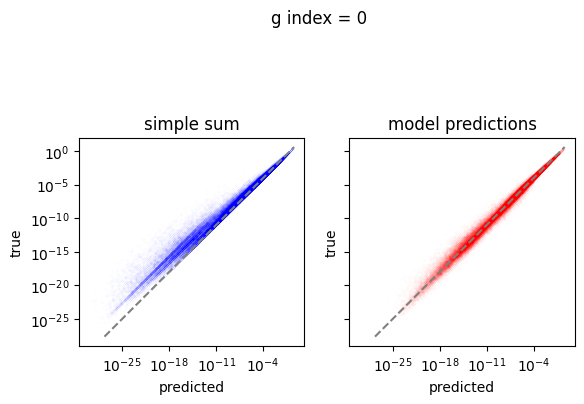

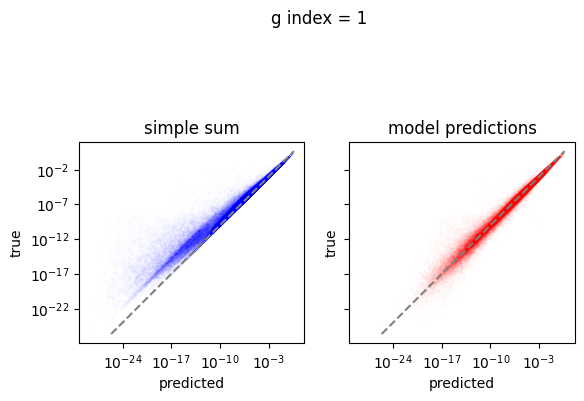

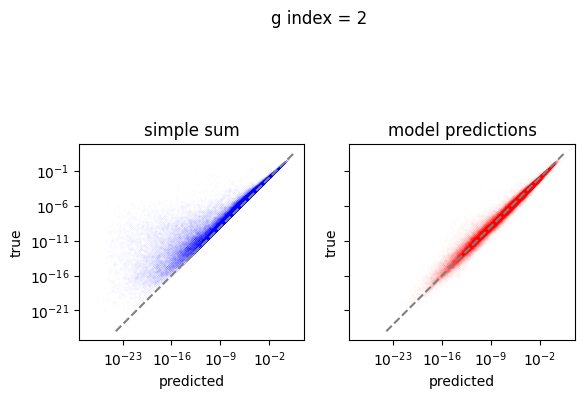

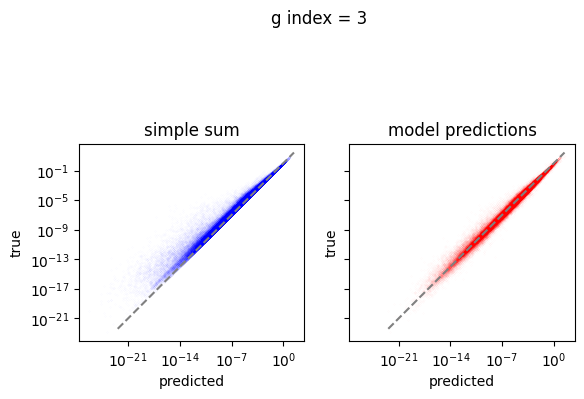

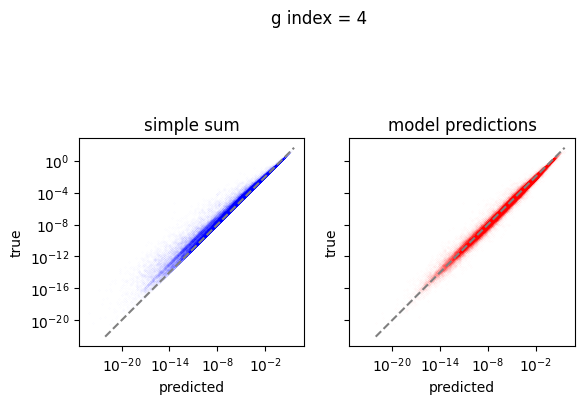

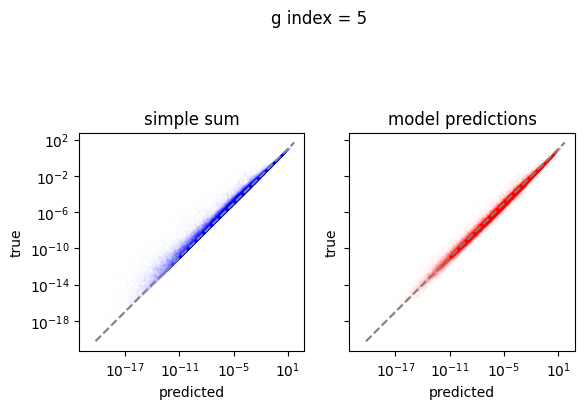

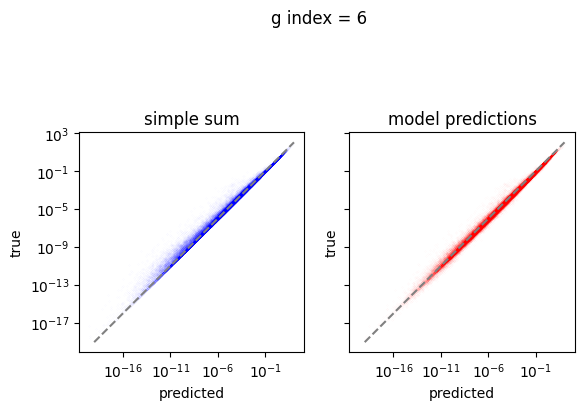

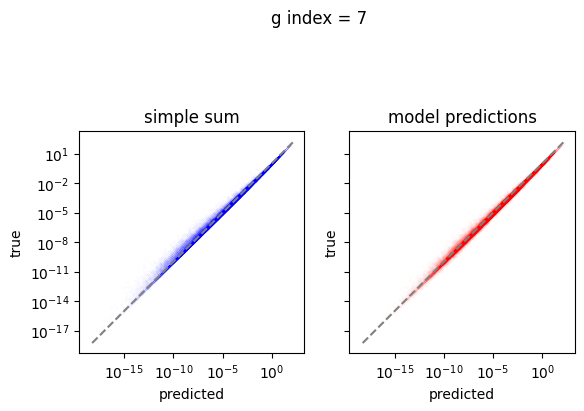

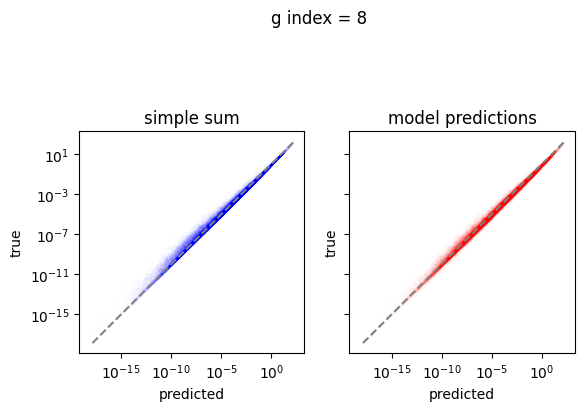

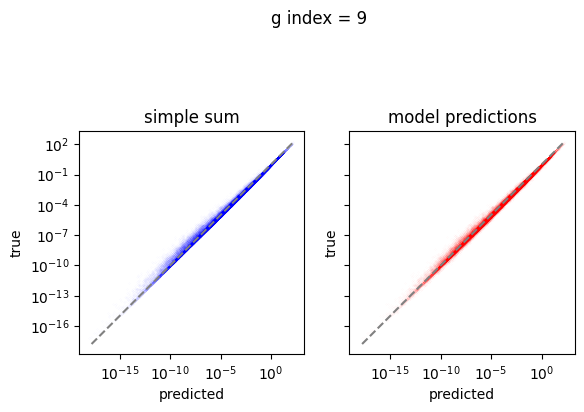

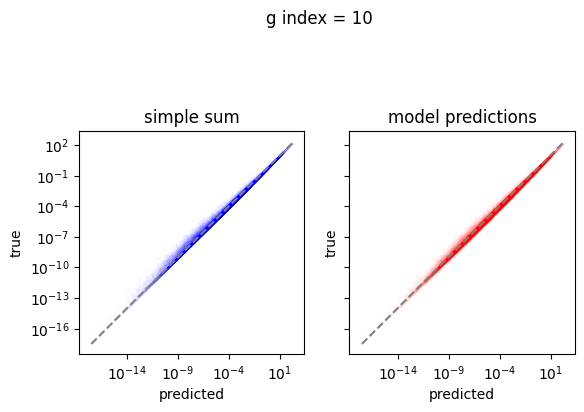

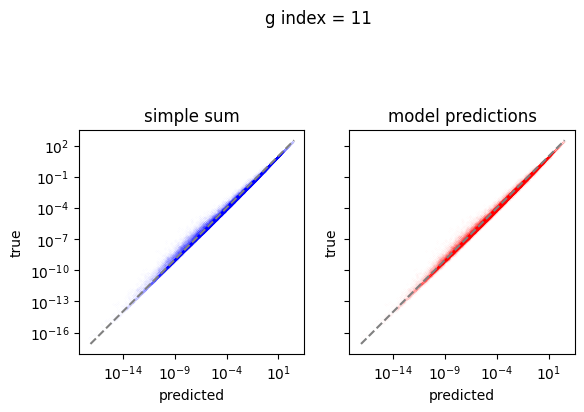

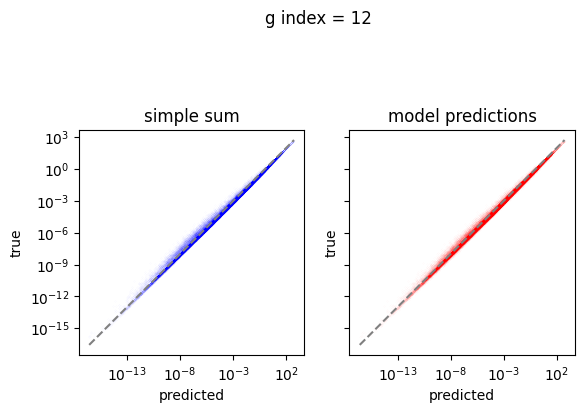

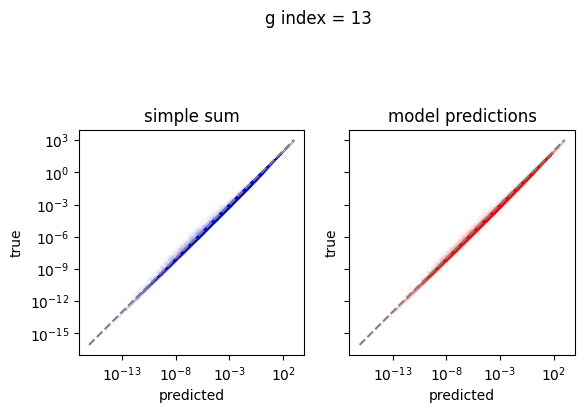

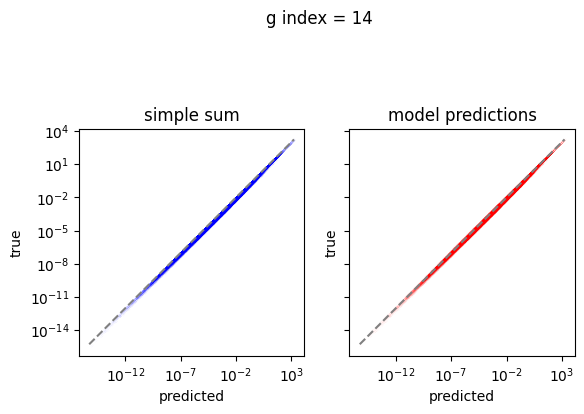

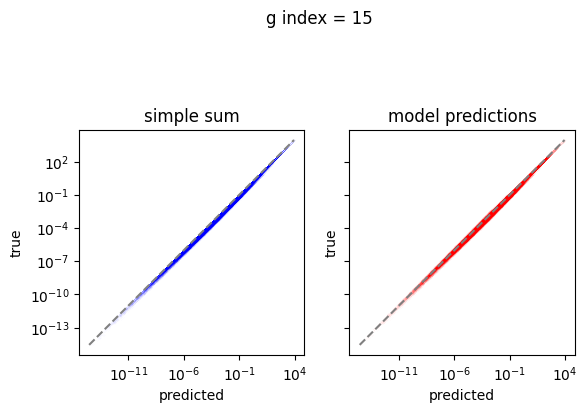

In [12]:
em.plot_predictions()

Export the model to exorad and numpy

In [13]:
em.export('data/mix_S1/',format='np')
em.export('data/mix_S1/',format='exorad')

em.export('/Users/schneider/codes/exo/exorad/verification/HD2/input',format='exorad')
em.export('/Users/schneider/codes/exo/exorad/verification/fluxes/input',format='exorad')

## simple numpy implementation

Here is a simple numpy implementation of the DeepSet

In [14]:
mlp_weights = [weights.numpy() for weights in em.model.weights]
def simple_mlp(kappas):
    rep = np.tensordot(kappas, mlp_weights[0], axes=(1,0))  # first dense
    rep[rep <= 0.0] = 0.0
    sum_rep = np.sum(rep, axis=1)   # sum
    dec = np.tensordot(sum_rep, mlp_weights[1], axes=(-1,0))  # second dense
    return dec

5000/5000 [==============================] - 5s 970us/step


AssertionError: 
Not equal to tolerance rtol=1e-07, atol=0

Mismatched elements: 2119793 / 2560000 (82.8%)
Max absolute difference: 8.83962188e-06
Max relative difference: 0.38247769
 x: array([[ 2.946265e-01,  5.800110e-01,  6.124302e-01, ...,  9.491354e-02,
         1.247345e-02,  4.231251e-02],
       [ 3.556746e+00,  3.100837e+00,  2.263289e+00, ...,  3.352401e-01,...
 y: array([[ 2.946258e-01,  5.800106e-01,  6.124302e-01, ...,  9.491348e-02,
         1.247348e-02,  4.231254e-02],
       [ 3.556746e+00,  3.100837e+00,  2.263288e+00, ...,  3.352401e-01,...